<a href="https://colab.research.google.com/github/chaulagai2001/Speech_recognition/blob/main/Preprocessing_for_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries & Data

In [ ]:
import librosa as lr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle as pk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
import torchaudio

In [ ]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
import zipfile

zip_file_path = r"C:\Users\Dell\OneDrive\Desktop\project\archive (1).zip"

extracted_folder_path = '/data'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified folder
    zip_ref.extractall(extracted_folder_path)

print(f"Zip file '{zip_file_path}' extracted to '{extracted_folder_path}'")

Zip file 'C:\Users\Dell\OneDrive\Desktop\project\archive (1).zip' extracted to '/data'


In [ ]:
dataset='/data/augmented_dataset/augmented_dataset'
pd.DataFrame(os.listdir(dataset),columns=['Files'])

,Files
0,bed
1,bird
2,cat
3,dog
4,down
5,eight
6,five
7,four
8,go
9,happy


In [ ]:
def count(path):
    size=[]
    for file in os.listdir(path):
        size.append(len(os.listdir(os.path.join(path,file))))
    return pd.DataFrame(size,columns=['Number Of Sample'],index=os.listdir(path))
tr=count(dataset)
tr

,Number Of Sample
bed,1356
bird,1346
cat,1378
dog,1474
down,1188
eight,1113
five,1092
four,2400
go,960
happy,1481


In [ ]:
root_folder = '/data/augmented_dataset/augmented_dataset'

# Create a list to store data
audio_data = []

# Function to calculate audio file duration
def get_audio_duration(file_path):
    waveform, sample_rate = torchaudio.load(file_path)
    duration = waveform.size(1) / sample_rate
    return duration

# Traverse through all subdirectories and calculate duration for each audio file
for root, dirs, files in os.walk(root_folder):
    for audio_file in files:
        if audio_file.endswith('.wav'):
            file_path = os.path.join(root, audio_file)
            duration = get_audio_duration(file_path)
            label = os.path.basename(root)
            audio_data.append({'AudioFile': file_path, 'Duration': duration, 'Label': label})
# Create a Pandas DataFrame from the list
clip_duration = pd.DataFrame(audio_data)

# Display the DataFrame
print(clip_duration)

                                               AudioFile  Duration Label
0      /data/augmented_dataset/augmented_dataset\bed\...       1.0   bed
1      /data/augmented_dataset/augmented_dataset\bed\...       1.0   bed
2      /data/augmented_dataset/augmented_dataset\bed\...       1.0   bed
3      /data/augmented_dataset/augmented_dataset\bed\...       1.0   bed
4      /data/augmented_dataset/augmented_dataset\bed\...       1.0   bed
...                                                  ...       ...   ...
41844  /data/augmented_dataset/augmented_dataset\zero...       1.0  zero
41845  /data/augmented_dataset/augmented_dataset\zero...       1.0  zero
41846  /data/augmented_dataset/augmented_dataset\zero...       1.0  zero
41847  /data/augmented_dataset/augmented_dataset\zero...       1.0  zero
41848  /data/augmented_dataset/augmented_dataset\zero...       1.0  zero

[41849 rows x 3 columns]


In [ ]:
def count(path):
    size=[]
    for file in os.listdir(path):
        size.append(len(os.listdir(os.path.join(path,file))))
    return pd.DataFrame(size,columns=['Number Of Sample'],index=os.listdir(path))
count = count(dataset)
count

,Number Of Sample
bed,1356
bird,1346
cat,1378
dog,1474
down,1188
eight,1113
five,1092
four,2400
go,960
happy,1481


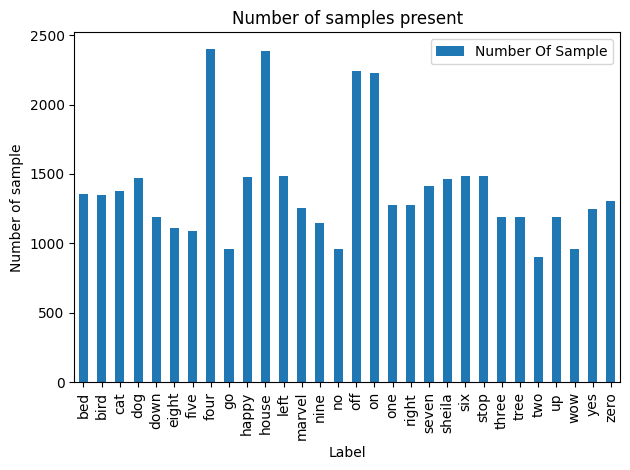

In [ ]:
# Create a bar plot
count.plot(kind='bar')
plt.title('Number of samples present')
plt.xlabel('Label')
plt.ylabel('Number of sample')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

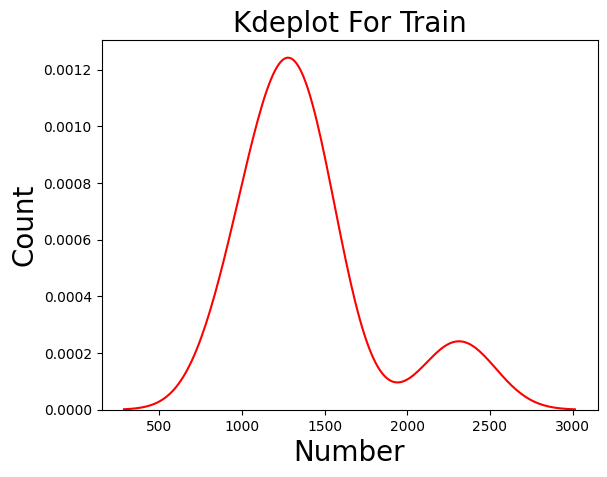

In [ ]:
sns.kdeplot(tr['Number Of Sample'], color='red')
plt.title('Kdeplot For Train', fontsize=20)
plt.xlabel('Number', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [ ]:
def load(path):
    data=[]
    label=[]
    sample=[]
    for file in os.listdir(path):
        path_=os.path.join(path,file)
        for fil in os.listdir(path_):
            data_contain,sample_rate=lr.load(os.path.join(path_,fil) ,sr=16000)
            data.append(data_contain)
            sample.append(sample_rate)
            label.append(file)
    return data,label,sample

In [ ]:
data,label,sample=load(dataset)
df=pd.DataFrame()
df['Label'],df['sample']=label,sample
df

,Label,sample
0,bed,16000
1,bed,16000
2,bed,16000
3,bed,16000
4,bed,16000
...,...,...
41844,zero,16000
41845,zero,16000
41846,zero,16000
41847,zero,16000


# Audio Feature Extraction

In [ ]:
#waveform

def waveform(data,sr,label):
    plt.figure(figsize=(14, 5))
    lr.display.waveshow(data, sr=sr)
    plt.suptitle(label)
    plt.title('Waveform plot')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

#MFCC features

def mfcc(data, sr):
    mfccs = lr.feature.mfcc(y=data, sr=sr)
    return np.mean(mfccs), mfccs
def mfcc_v(mfccs,label):
    plt.figure(figsize=(10, 4))
    lr.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.suptitle(label)

#Mel-spectrogram

def Mel(data, sr):
    mel_spec = lr.feature.melspectrogram(y=data, sr=sr)
    return np.mean(mel_spec), mel_spec

def mel_v(mel_spec,label,sr):
    # Convert to decibel scale
    mel_spec_db = lr.power_to_db(mel_spec, ref=np.max)
    # Visualize Mel-spectrogram
    plt.figure(figsize=(10, 4))
    lr.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-spectrogram')
    plt.suptitle(label)

#zero_crossing_rate

def zero_crossing(data,sr):
    # Compute zero-crossing rate
    zcr = lr.feature.zero_crossing_rate(data)
    # Print average zero-crossing rate
    avg_zcr = sum(zcr[0])/len(zcr[0])
    print("Average zero-crossing rate:", avg_zcr)
    return zcr

def zero_crossing_v(zcr,label,data,sr):
    time = lr.times_like(zcr)
    # Create waveform plot
    plt.figure(figsize=(14, 5))
    lr.display.waveshow(data, sr=sr, alpha=0.5)
    plt.plot(time, zcr[0], color='r')
    plt.title('Zero-crossing rate')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.suptitle(label)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


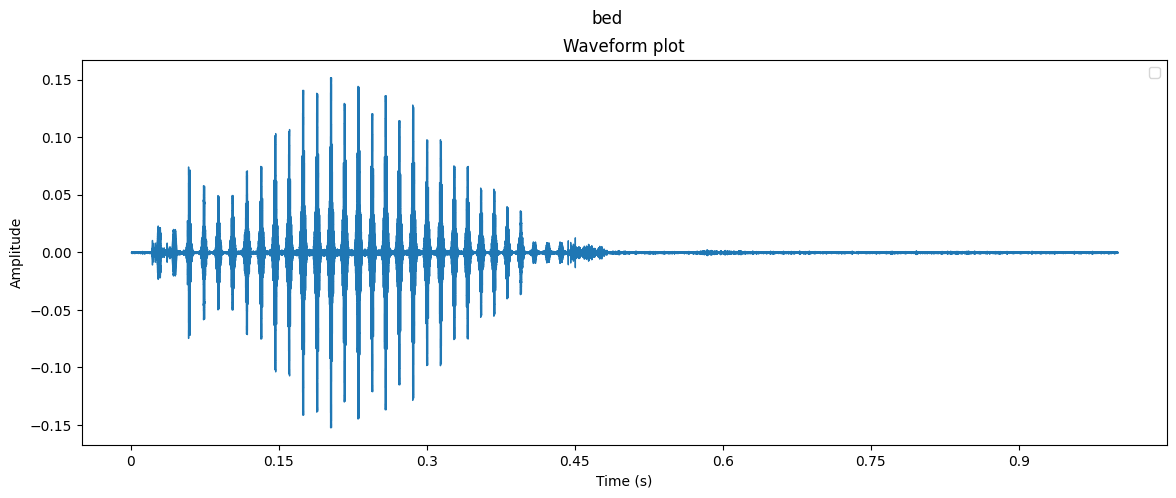

In [ ]:
#waveform data[0]
waveform(data[0],sample[0],label[0])
plt.legend()

MFCCs Mean: -22.473103
MFCCs shape: (20, 32)


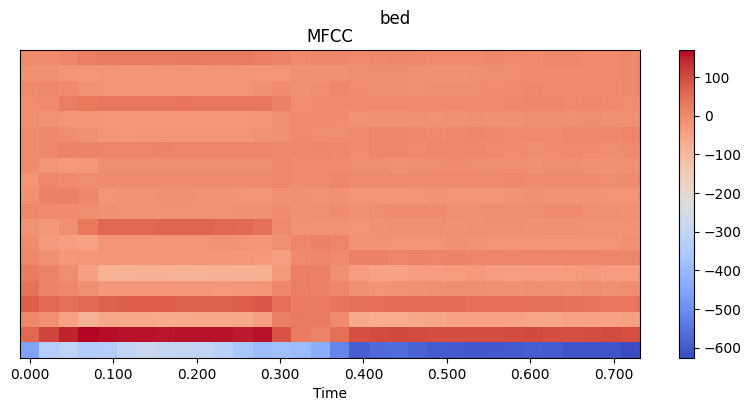

In [ ]:
#MFCC data[0]
mfccs_mean, mfccs = mfcc(data[0], sample[0])
print('MFCCs Mean:', mfccs_mean)
print('MFCCs shape:', mfccs.shape)
mfcc_v(mfccs,label[0])

Mel Mean: 0.04585984
Mel : (128, 32)


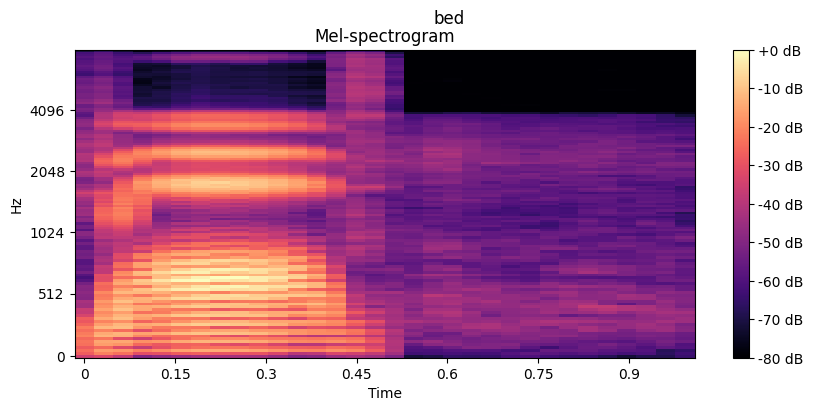

In [ ]:
##Mel-spectrogram data[0]
mel_mean,mel=Mel(data[0],sample[0])
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
mel_v(mel,label[0],sample[0])

In [ ]:
lr.mel_frequencies (n_mels = 100)

array([    0.        ,    33.60982793,    67.21965587,   100.8294838 ,
         134.43931173,   168.04913966,   201.6589676 ,   235.26879553,
         268.87862346,   302.48845139,   336.09827933,   369.70810726,
         403.31793519,   436.92776313,   470.53759106,   504.14741899,
         537.75724692,   571.36707486,   604.97690279,   638.58673072,
         672.19655866,   705.80638659,   739.41621452,   773.02604245,
         806.63587039,   840.24569832,   873.85552625,   907.46535418,
         941.07518212,   974.68501005,  1008.59096516,  1044.16268301,
        1080.98897001,  1119.11407321,  1158.58380021,  1199.44557418,
        1241.74849083,  1285.54337744,  1330.88285388,  1377.82139586,
        1426.4154004 ,  1476.72325354,  1528.80540054,  1582.72441849,
        1638.54509148,  1696.33448845,  1756.16204381,  1818.09964078,
        1882.22169786,  1948.60525817,  2017.33008204,  2088.47874286,
        2162.13672626,  2238.39253285,  2317.33778455,  2399.06733466,
      

## default parameters of the library and changing them

## changing the windows type

In [ ]:
def Mel(data, sr=22050, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='constant', power=2.0):
    mel_spec = lr.feature.melspectrogram(y=data,
                                         sr=sr,
                                         n_fft=n_fft,
                                         hop_length=hop_length,
                                         win_length=win_length,
                                         window=window,
                                         center=center,
                                         pad_mode=pad_mode,
                                         power=power)
    return np.mean(mel_spec), mel_spec


# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Window Type', 'Mel Mean'])

# Define a list of window types to iterate through
window_types = ['hann', 'hamming', 'blackman', 'rectangular']  # Add more window types as needed

# Iterate through each window type
for window_type in window_types:
    # Call the Mel function with the current window type
    Mel_mean, _ = Mel(data[0], sr=sample[0], window=window_type)

    # Append the results to the DataFrame
    results_df = results_df.append({'Window Type': window_type, 'Mel Mean': Mel_mean}, ignore_index=True)

# Display the final DataFrame
print(results_df)


   Window Type  Mel Mean
0         hann  0.045860
1      hamming  0.048598
2     blackman  0.037254
3  rectangular  0.122115


C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\3267479279.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Window Type': window_type, 'Mel Mean': Mel_mean}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\3267479279.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Window Type': window_type, 'Mel Mean': Mel_mean}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\3267479279.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Window Type': window_type, 'Mel Mean': Mel_mean}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\3267479279.py:26: FutureWarning: The frame.

<Figure size 800x400 with 0 Axes>

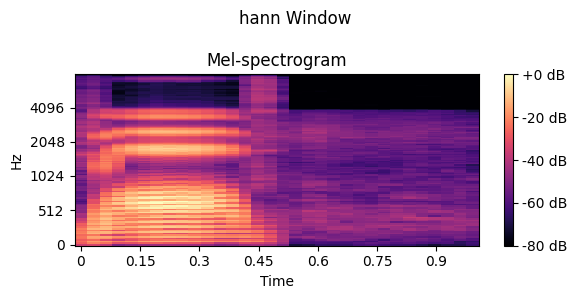

<Figure size 800x400 with 0 Axes>

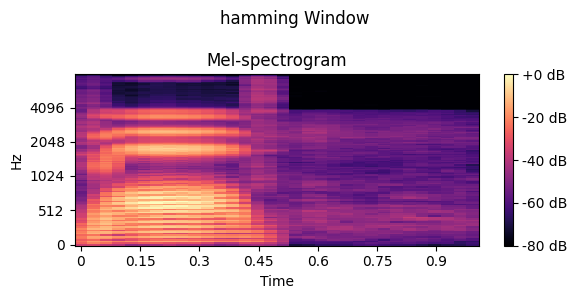

<Figure size 800x400 with 0 Axes>

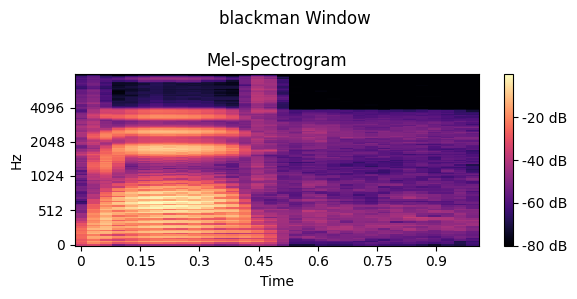

<Figure size 800x400 with 0 Axes>

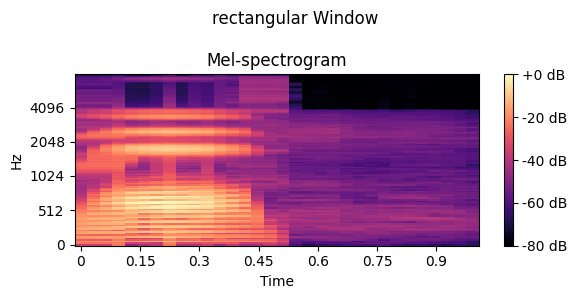

In [ ]:
def Mel(data, sr=22050, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='constant', power=2.0):
    mel_spec = lr.feature.melspectrogram(y=data,
                                         sr=sr,
                                         n_fft=n_fft,
                                         hop_length=hop_length,
                                         win_length=win_length,
                                         window=window,
                                         center=center,
                                         pad_mode=pad_mode,
                                         power=power)
    return mel_spec

def mel_v(mel_spec, label, sr):
    # Convert to decibel scale
    mel_spec_db = lr.power_to_db(mel_spec, ref=np.max)
    # Visualize Mel-spectrogram
    plt.figure(figsize=(6, 3))  # Adjust the figsize as needed
    lr.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-spectrogram')
    plt.suptitle(label)

# Define a list of window types to iterate through
window_types = ['hann', 'hamming', 'blackman', 'rectangular']

# Plot the Mel-spectrogram using mel_v function separately for each window type
for window_type in window_types:
    plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
    mel_spec = Mel(data[0], sr=sample[0], window=window_type)
    mel_v(mel_spec, label=f'{window_type} Window', sr=sample[0])
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

windows_df = pd.DataFrame(columns=['Window Type', 'Mel Mean', 'MSE', 'SSI', 'PSNR'])

# Define a reference window type
reference_window_type = 'hann'
reference_mel_spec = Mel(data[0], sr=sample[0], window=reference_window_type)
# Iterate through each window type
for window_type in window_types:
    current_mel_spec = Mel(data[0], sr=sample[0], window=window_type)
    mse = mean_squared_error(reference_mel_spec.flatten(), current_mel_spec.flatten())
    ssi = ssim(reference_mel_spec, current_mel_spec, data_range=current_mel_spec.max() - current_mel_spec.min())
    psnr_value = psnr(reference_mel_spec, current_mel_spec, data_range=current_mel_spec.max() - current_mel_spec.min())

    # Append the results to the DataFrame
    windows_df = windows_df.append({
        'Window Type': window_type,
        'Mel Mean': np.mean(current_mel_spec),
        'MSE': mse,
        'SSI': ssi,
        'PSNR': psnr_value
    }, ignore_index=True)

# Display the DataFrame with all parameters
windows_df


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\3789179233.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_df = windows_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\3789179233.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_df = windows_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\3789179233.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  windows_df = windows_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\3789179233.py:18: FutureWarning

,Window Type,Mel Mean,MSE,SSI,PSNR
0,hann,0.045860,0.000000,1.000000,inf
1,hamming,0.048598,0.000244,0.999460,50.835898
2,blackman,0.037254,0.002519,0.993010,38.485972
3,rectangular,0.122115,0.150566,0.910638,29.360109


## changing the sampling rate

In [ ]:
def Mel(data, sr=22050, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='constant', power=2.0):
    mel_spec = lr.feature.melspectrogram(y=data,
                                         sr=sr,
                                         n_fft=n_fft,
                                         hop_length=hop_length,
                                         win_length=win_length,
                                         window=window,
                                         center=center,
                                         pad_mode=pad_mode,
                                         power=power)
    return mel_spec

def mel_v(mel_spec, label, sr):
    # Convert to decibel scale
    mel_spec_db = lr.power_to_db(mel_spec, ref=np.max)
    # Visualize Mel-spectrogram
    plt.figure(figsize=(6, 3))  # Adjust the figsize as needed
    lrd.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-spectrogram')
    plt.suptitle(label)

def evaluate_metrics(data, sample_rates):
    sampling_df = pd.DataFrame(columns=['Sampling Rate', 'Mel Mean', 'MSE', 'SSI', 'PSNR'])

    for sr in sample_rates:
        mel_spec = Mel(data[0], sr=sr, window='hann')  # Use hann window
        mse = mean_squared_error(reference_mel_spec.flatten(), mel_spec.flatten())
        ssi = ssim(reference_mel_spec, mel_spec, data_range=mel_spec.max() - mel_spec.min())
        psnr_value = psnr(reference_mel_spec, mel_spec, data_range=mel_spec.max() - mel_spec.min())

        sampling_df = sampling_df.append({
            'Sampling Rate': sr,
            'Mel Mean': np.mean(mel_spec),
            'MSE': mse,
            'SSI': ssi,
            'PSNR': psnr_value
        }, ignore_index=True)

    return sampling_df

# Define different sampling rates
sample_rates = [22050, 1000, 20000, 30000, 50000, 100000]

# Define a reference sampling rate and window type
reference_mel_spec = Mel(data[0], sr=sample_rates[0], window='hann')

# Evaluate metrics for different sampling rates
sampling_df = evaluate_metrics(data, sample_rates)

# Display the DataFrame with all parameters
sampling_df


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\4157149710.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampling_df = sampling_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\4157149710.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampling_df = sampling_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\4157149710.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampling_df = sampling_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\4157149710.py:32: FutureW

,Sampling Rate,Mel Mean,MSE,SSI,PSNR
0,22050.0,0.039486,0.000000,1.000000,inf
1,1000.0,0.321148,4.315999,0.881292,25.660249
2,20000.0,0.041431,0.089036,0.866749,25.304920
3,30000.0,0.030804,0.052055,0.812655,24.106836
4,50000.0,0.018042,0.058242,0.715049,17.586648
5,100000.0,0.008342,0.053733,0.667262,12.122718


<Figure size 400x400 with 0 Axes>

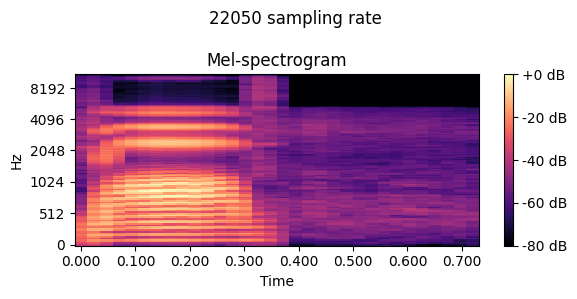

<Figure size 400x400 with 0 Axes>

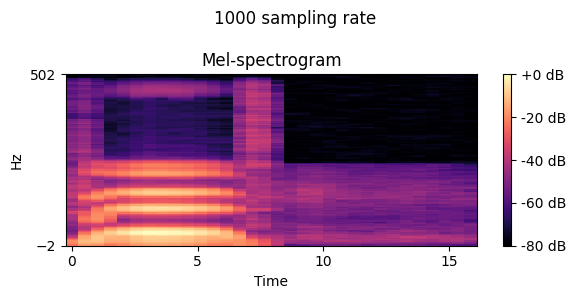

<Figure size 400x400 with 0 Axes>

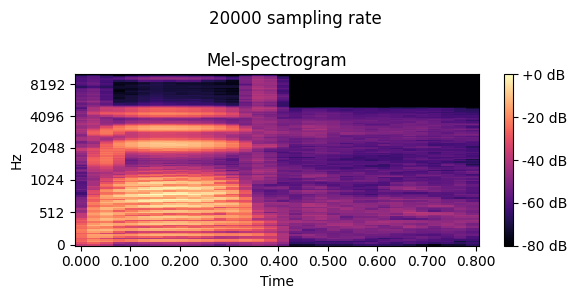

<Figure size 400x400 with 0 Axes>

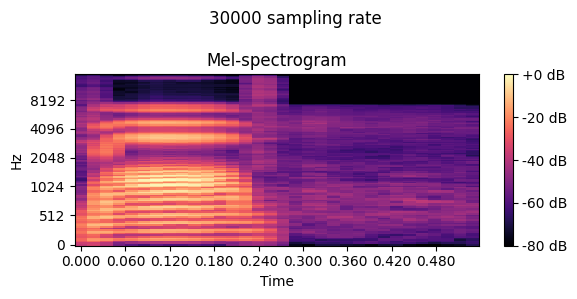

<Figure size 400x400 with 0 Axes>

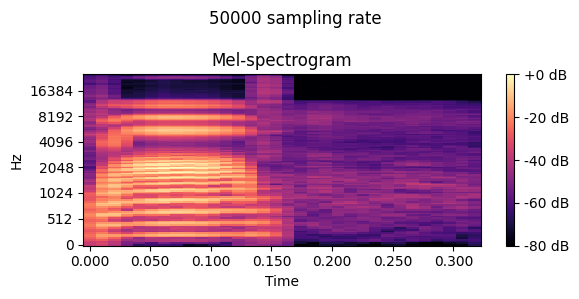

<Figure size 400x400 with 0 Axes>

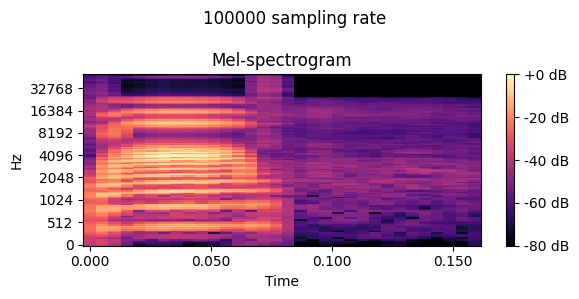

In [ ]:
def Mel(data, sr=22050, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='constant', power=2.0):
    mel_spec = lr.feature.melspectrogram(y=data,
                                         sr=sr,
                                         n_fft=n_fft,
                                         hop_length=hop_length,
                                         win_length=win_length,
                                         window=window,
                                         center=center,
                                         pad_mode=pad_mode,
                                         power=power)
    return mel_spec

def mel_v(mel_spec, label, sr):
    # Convert to decibel scale
    mel_spec_db = lr.power_to_db(mel_spec, ref=np.max)
    # Visualize Mel-spectrogram
    plt.figure(figsize=(6, 3))  # Adjust the figsize as needed
    lr.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-spectrogram')
    plt.suptitle(label)

sample_rates = [22050, 1000, 20000, 30000, 50000, 100000]

# Plot the Mel-spectrogram using mel_v function separately for each window type
for sampling_rate in sample_rates:
    plt.figure(figsize=(4, 4))  # Adjust the figsize as needed
    mel_spec = Mel(data[0], sr=sampling_rate)
    mel_v(mel_spec, label=f'{sampling_rate} sampling rate', sr=sampling_rate)
    plt.tight_layout()
    plt.show()


Average zero-crossing rate: 0.1768035888671875
Zcr: (1, 32)


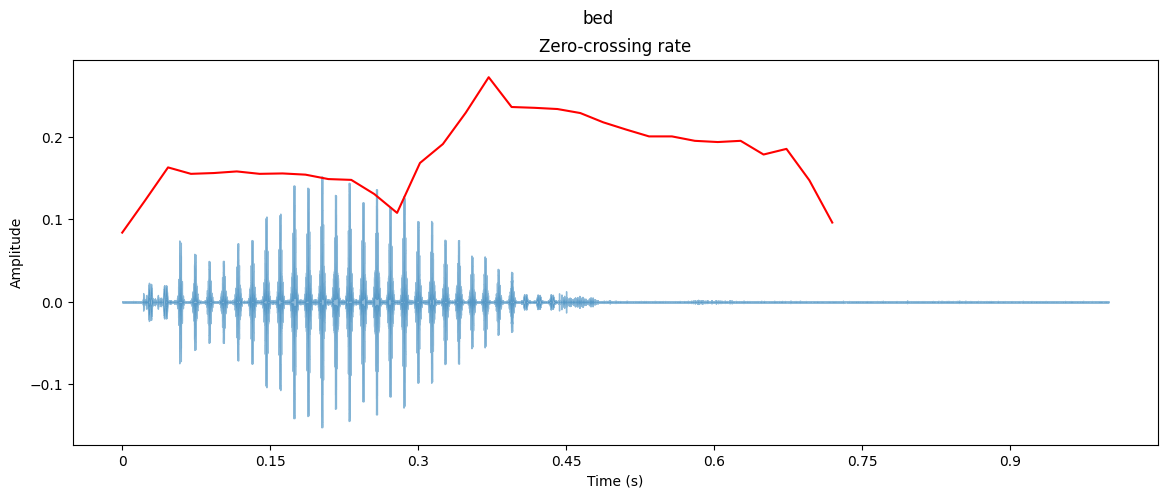

In [ ]:
#zero_crossing data[0]
zcr=zero_crossing(data[0],sample[0])
print('Zcr:',zcr.shape)
zero_crossing_v(zcr,label[0],data[0],sample[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


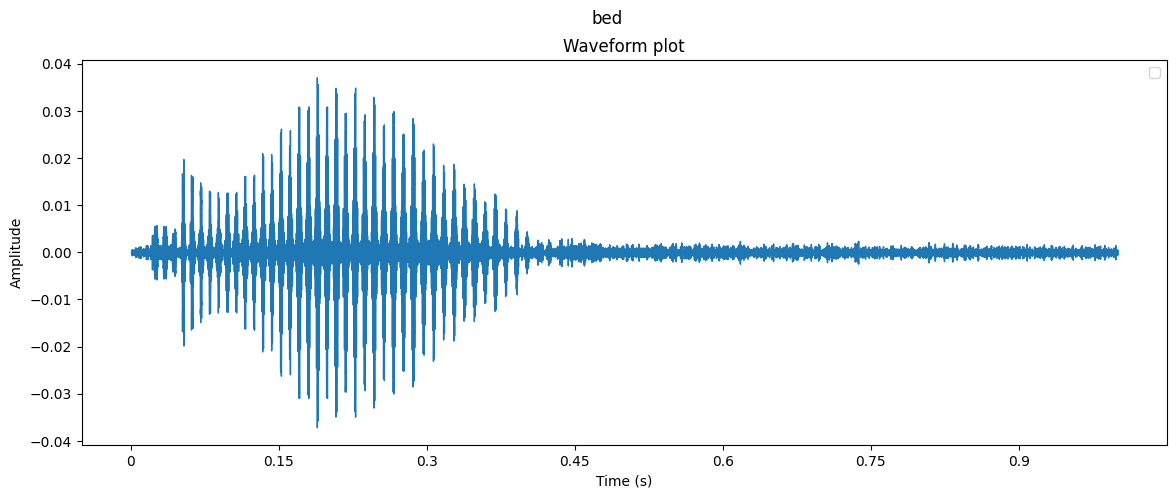

In [ ]:
#waveform data[1000]
waveform(data[1000],sample[1000],label[1000])
plt.legend()

MFCCs Mean: -20.893103
MFCCs shape: (20, 32)


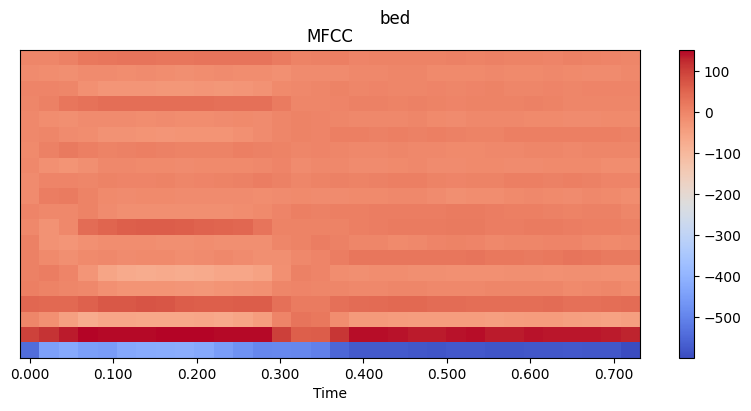

In [ ]:
#MFCC data[1000]
mfccs_mean, mfccs = mfcc(data[1000], sample[1000])
print('MFCCs Mean:', mfccs_mean)
print('MFCCs shape:', mfccs.shape)
mfcc_v(mfccs,label[1000])

Mel Mean: 0.0037993134
Mel : (128, 32)


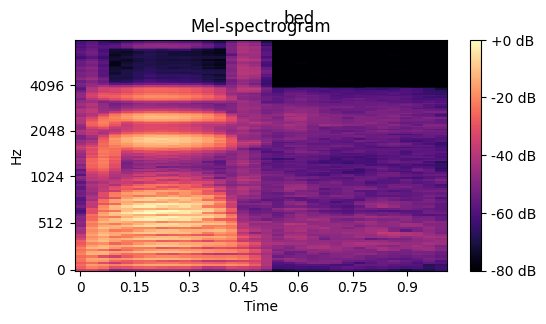

In [ ]:
##Mel-spectrogram data[1000]
mel_spec = Mel(data[1000],sample[1000])
mel_mean = np.mean(mel_spec)
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
mel_v(mel,label[1000],sample[1000])

Average zero-crossing rate: 0.1236572265625
Zcr: (1, 32)


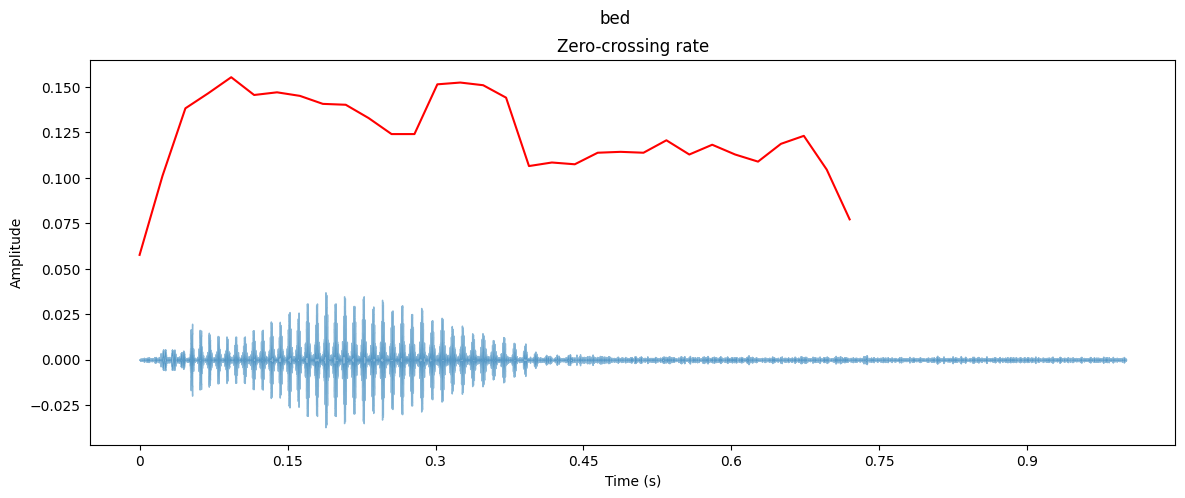

In [ ]:
#zero_crossing data[1000]
zcr=zero_crossing(data[1000],sample[1000])
print('Zcr:',zcr.shape)
zero_crossing_v(zcr,label[1000],data[1000],sample[1000])

In [ ]:
code={}
x=0
for i in pd.unique(label):
    code[i]=x
    x+=1
pd.DataFrame(code.values(),columns=['Value'],index=code.keys())

,Value
bed,0
bird,1
cat,2
dog,3
down,4
eight,5
five,6
four,7
go,8
happy,9


In [ ]:
def get_Name(N):
    for x,y in code.items():
          if y==N:
                return x
for i in range(len(label)):
    label[i]=code[label[i]]
pd.DataFrame(label,columns=['Labels'])

,Labels
0,0
1,0
2,0
3,0
4,0
...,...
41844,29
41845,29
41846,29
41847,29


In [ ]:
mfccs = [lr.feature.mfcc(y=d, sr=s, n_mfcc=13) for d,s in zip(data, sample)]
mfccs = np.array(mfccs)

In [ ]:
def MFCC_mean(data, sr=22050, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='constant', n_mfcc=13, dct_type=2):
    mfccs = lr.feature.mfcc(y=data,
                            sr=sr,
                            n_fft=n_fft,
                            hop_length=hop_length,
                            win_length=win_length,
                            window=window,
                            center=center,
                            pad_mode=pad_mode,
                            n_mfcc=n_mfcc,
                            dct_type=dct_type)
    return np.mean(mfccs), mfccs

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Window Type', 'MFCC Mean'])

# Define a list of window types to iterate through
window_types = ['hann', 'hamming', 'blackman', 'rectangular']  # Add more window types as needed

# Iterate through each window type
for window_type in window_types:
    # Call the MFCC_mean function with the current window type
    mfcc_mean, _ = MFCC_mean(data[0], sr=sample[0], window=window_type)

    # Append the results to the DataFrame
    results_df = results_df.append({'Window Type': window_type, 'MFCC Mean': mfcc_mean}, ignore_index=True)

# Display the final DataFrame
print(results_df)


   Window Type  MFCC Mean
0         hann -33.661949
1      hamming -33.359947
2     blackman -34.526558
3  rectangular -28.761705


C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\854737615.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Window Type': window_type, 'MFCC Mean': mfcc_mean}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\854737615.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Window Type': window_type, 'MFCC Mean': mfcc_mean}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\854737615.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Window Type': window_type, 'MFCC Mean': mfcc_mean}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\854737615.py:26: FutureWarning: The 

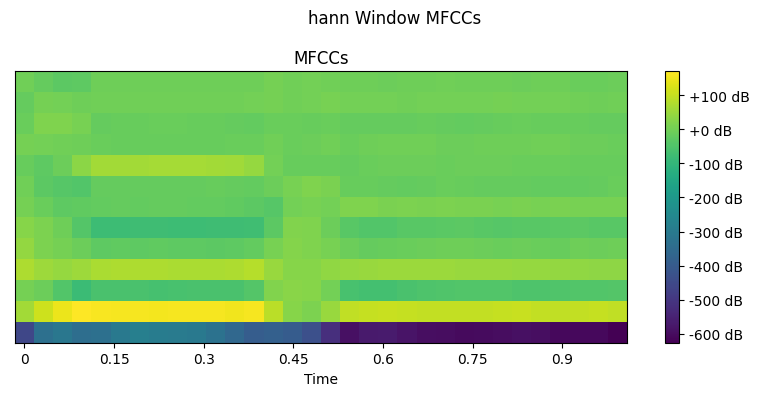

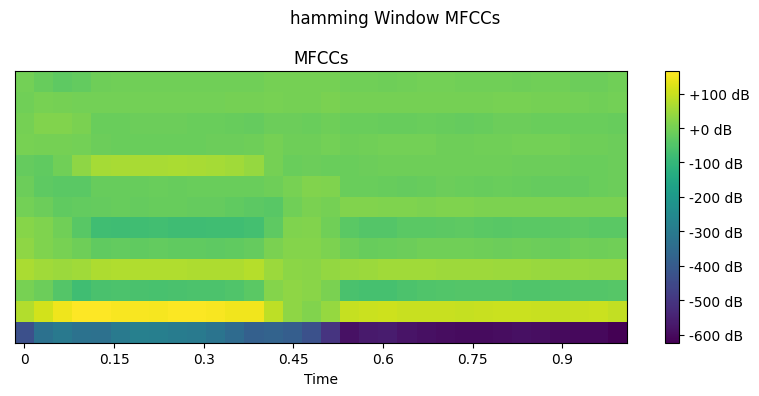

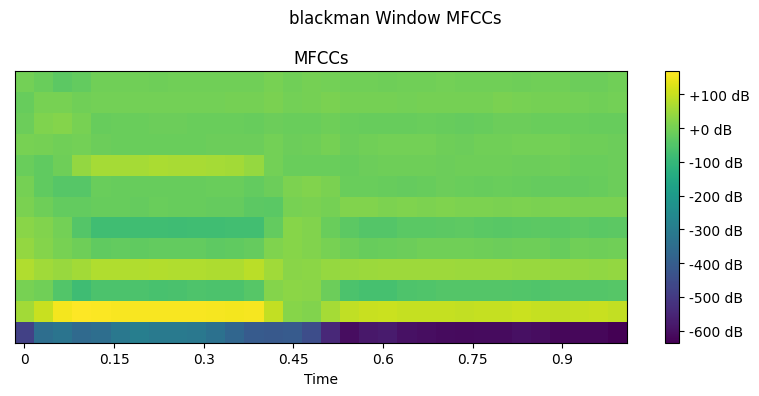

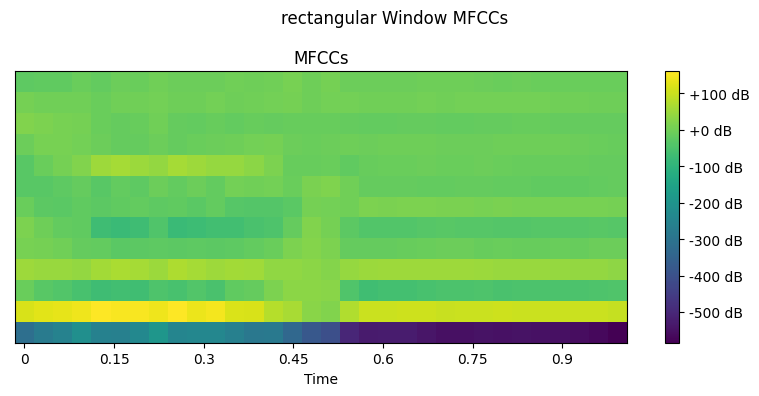

In [ ]:
import librosa as lr
import matplotlib.pyplot as plt
import numpy as np

def MFCC(data, sr=22050, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='constant', n_mfcc=13, dct_type=2):
    mfccs = lr.feature.mfcc(y=data,
                            sr=sr,
                            n_fft=n_fft,
                            hop_length=hop_length,
                            win_length=win_length,
                            window=window,
                            center=center,
                            pad_mode=pad_mode,
                            n_mfcc=n_mfcc,
                            dct_type=dct_type)
    return mfccs

def mfcc_plot(mfccs, label, sr):
    # Visualize MFCCs
    plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
    lr.display.specshow(mfccs, x_axis='time', sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCCs')
    plt.suptitle(label)
    plt.tight_layout()
    plt.show()

# Define a list of window types to iterate through
window_types = ['hann', 'hamming', 'blackman', 'rectangular']

# Plot the MFCCs using mfcc_plot function separately for each window type
for window_type in window_types:
    mfccs = MFCC(data[0], sr=sample[0], window=window_type)
    mfcc_plot(mfccs, label=f'{window_type} Window MFCCs', sr=sample[0])


In [ ]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

mfccs_df = pd.DataFrame(columns=['Window Type', 'MFCC Mean', 'MSE', 'SSI', 'PSNR'])

# Define a reference window type
reference_window_type = 'hann'
reference_mfccs = MFCC(data[0], sr=sample[0], window=reference_window_type)
# Iterate through each window type
for window_type in window_types:
    current_mfccs = MFCC(data[0], sr=sample[0], window=window_type)
    mse = mean_squared_error(reference_mfccs.flatten(), current_mfccs.flatten())
    ssi = ssim(reference_mfccs, current_mfccs, data_range=current_mfccs.max() - current_mfccs.min())
    psnr_value = psnr(reference_mfccs, current_mfccs, data_range=current_mfccs.max() - current_mfccs.min())

    # Append the results to the DataFrame
    mfccs_df = mfccs_df.append({
        'Window Type': window_type,
        'MFCC Mean': np.mean(current_mfccs),
        'MSE': mse,
        'SSI': ssi,
        'PSNR': psnr_value
    }, ignore_index=True)

# Display the DataFrame with all parameters for MFCCs
mfccs_df



C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\2542896722.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mfccs_df = mfccs_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\2542896722.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mfccs_df = mfccs_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\2542896722.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mfccs_df = mfccs_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\2542896722.py:18: FutureWarning: The frame.

,Window Type,MFCC Mean,MSE,SSI,PSNR
0,hann,-33.661949,0.000000,1.000000,inf
1,hamming,-33.359947,8.496676,0.998534,48.644856
2,blackman,-34.526558,17.813948,0.998611,45.600257
3,rectangular,-28.761705,509.646912,0.959438,30.370989


<Figure size 400x400 with 0 Axes>

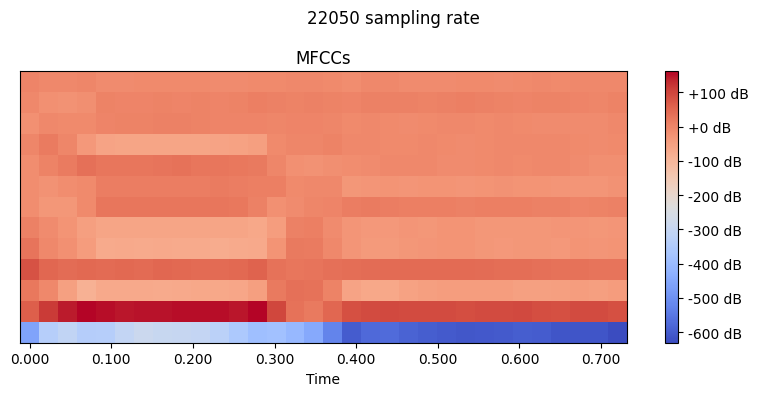

<Figure size 640x480 with 0 Axes>

<Figure size 400x400 with 0 Axes>

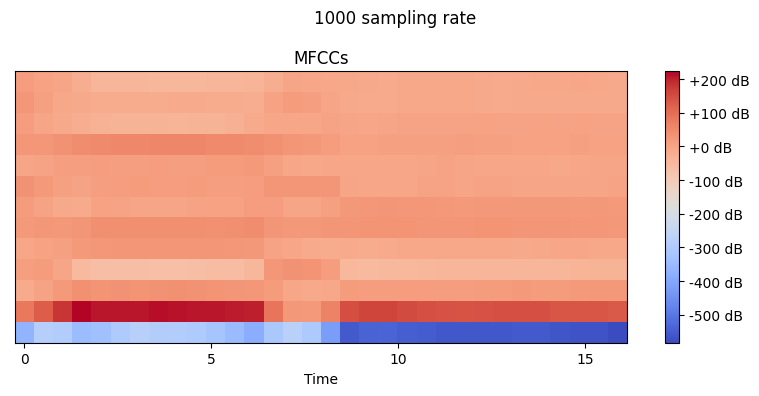

<Figure size 640x480 with 0 Axes>

<Figure size 400x400 with 0 Axes>

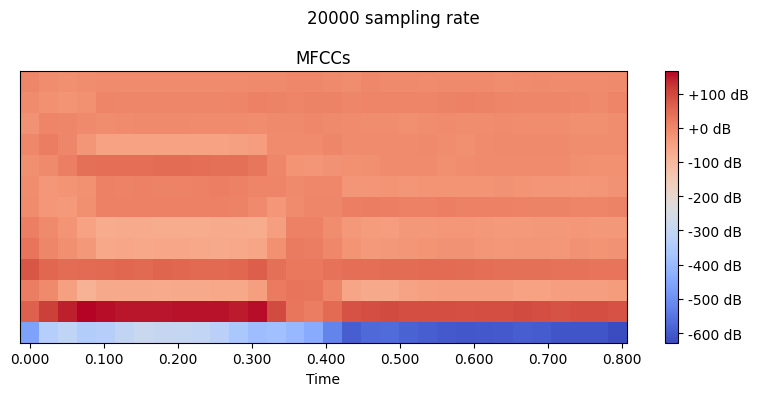

<Figure size 640x480 with 0 Axes>

<Figure size 400x400 with 0 Axes>

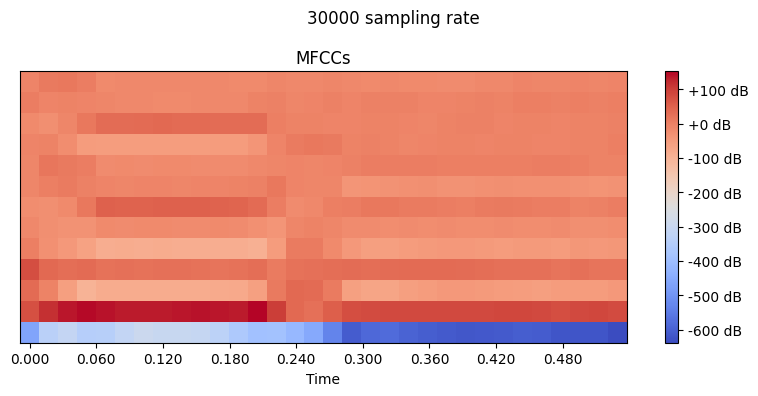

<Figure size 640x480 with 0 Axes>

<Figure size 400x400 with 0 Axes>

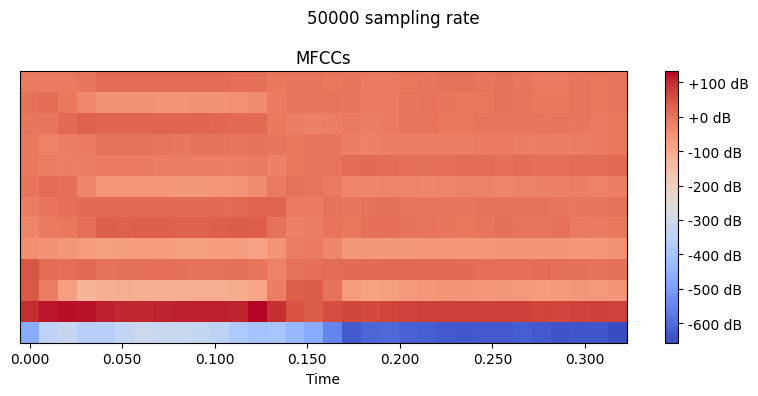

<Figure size 640x480 with 0 Axes>

<Figure size 400x400 with 0 Axes>

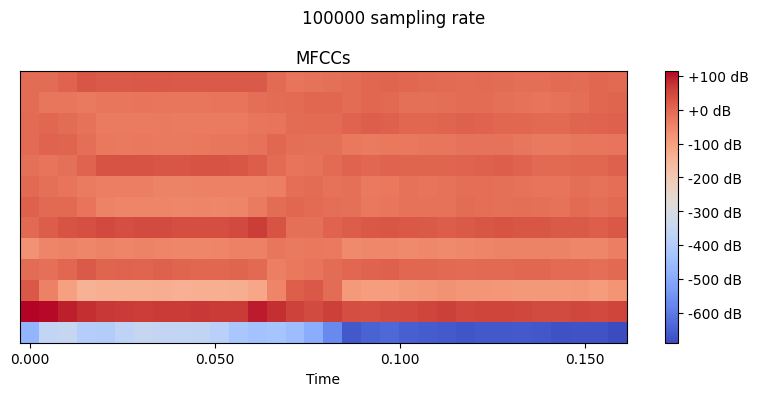

<Figure size 640x480 with 0 Axes>

In [ ]:
def MFCC(data, sr=22050, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='constant', n_mfcc=13, dct_type=2):
    mfccs = lr.feature.mfcc(y=data,
                            sr=sr,
                            n_fft=n_fft,
                            hop_length=hop_length,
                            win_length=win_length,
                            window=window,
                            center=center,
                            pad_mode=pad_mode,
                            n_mfcc=n_mfcc,
                            dct_type=dct_type)
    return mfccs

def mfcc_v(mfccs, label, sr):
    # Visualize MFCCs
    plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
    lr.display.specshow(mfccs, x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCCs')
    plt.suptitle(label)
    plt.tight_layout()
    plt.show()

sample_rates = [22050, 1000, 20000, 30000, 50000, 100000]

# Plot the MFCCs using mfcc_v function separately for each sampling rate
for sampling_rate in sample_rates:
    plt.figure(figsize=(4, 4))  # Adjust the figsize as needed
    mfccs = MFCC(data[0], sr=sampling_rate)
    mfcc_v(mfccs, label=f'{sampling_rate} sampling rate', sr=sampling_rate)
    plt.tight_layout()
    plt.show()


In [ ]:
def MFCC(data, sr=22050, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='constant', n_mfcc=13, dct_type=2):
    mfccs = lr.feature.mfcc(y=data,
                            sr=sr,
                            n_fft=n_fft,
                            hop_length=hop_length,
                            win_length=win_length,
                            window=window,
                            center=center,
                            pad_mode=pad_mode,
                            n_mfcc=n_mfcc,
                            dct_type=dct_type)
    return mfccs

def mfcc_v(mfccs, label, sr):
    # Visualize MFCCs
    plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
    lrd.specshow(mfccs, x_axis='time', sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCCs')
    plt.suptitle(label)
    plt.tight_layout()
    plt.show()

def evaluate_metrics_mfcc(data, sample_rates):
    sampling_df = pd.DataFrame(columns=['Sampling Rate', 'MFCC Mean', 'MSE', 'SSI', 'PSNR'])

    reference_mfccs = MFCC(data[0], sr=sample_rates[0], window='hann')  # Use hann window

    for sr in sample_rates:
        current_mfccs = MFCC(data[0], sr=sr, window='hann')  # Use hann window
        mse = mean_squared_error(reference_mfccs.flatten(), current_mfccs.flatten())
        ssi = ssim(reference_mfccs, current_mfccs, data_range=current_mfccs.max() - current_mfccs.min())
        psnr_value = psnr(reference_mfccs, current_mfccs, data_range=current_mfccs.max() - current_mfccs.min())

        sampling_df = sampling_df.append({
            'Sampling Rate': sr,
            'MFCC Mean': np.mean(current_mfccs),
            'MSE': mse,
            'SSI': ssi,
            'PSNR': psnr_value
        }, ignore_index=True)

    return sampling_df

# Define different sampling rates
sample_rates = [22050, 1000, 20000, 30000, 50000, 100000]

# Evaluate metrics for different sampling rates with MFCCs
sampling_df_mfcc = evaluate_metrics_mfcc(data, sample_rates)

# Display the DataFrame with all parameters for MFCCs
print(sampling_df_mfcc)


   Sampling Rate  MFCC Mean          MSE       SSI       PSNR
0        22050.0 -35.795803     0.000000  1.000000        inf
1         1000.0 -19.075846  2520.696533  0.173540  24.108700
2        20000.0 -35.238789    27.701008  0.981187  43.562080
3        30000.0 -38.720444   228.439377  0.860183  34.368497
4        50000.0 -42.989254   961.759033  0.496914  28.101604
5       100000.0 -49.593918  1648.522583  0.343715  25.924699


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\718729375.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampling_df = sampling_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\718729375.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampling_df = sampling_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\718729375.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampling_df = sampling_df.append({
C:\Users\Dell\AppData\Local\Temp\ipykernel_3824\718729375.py:35: FutureWarni